In [53]:
import math
import pandas_datareader as wb
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [54]:
df= pd.read_csv('/Users/kgirish/desktop/MRO.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1970-01-02,5.633611,5.757882,5.633611,5.757882,0.751289,105900
1,1970-01-05,5.757882,5.799305,5.757882,5.799305,0.756695,136100
2,1970-01-06,5.799305,5.799305,5.675035,5.695746,0.743183,159500
3,1970-01-07,5.695746,5.778594,5.654323,5.757882,0.751289,119600
4,1970-01-08,5.778594,5.965000,5.778594,5.965000,0.778315,454900
...,...,...,...,...,...,...,...
12824,2020-11-02,3.980000,4.220000,3.860000,4.150000,4.150000,28883800
12825,2020-11-03,4.250000,4.300000,4.100000,4.140000,4.140000,27651100
12826,2020-11-04,4.120000,4.340000,4.000000,4.270000,4.270000,48596200
12827,2020-11-05,4.290000,4.510000,4.210000,4.290000,4.290000,51484400


In [55]:
df1=df.reset_index()['Close']

In [56]:
df1

0        5.757882
1        5.799305
2        5.695746
3        5.757882
4        5.965000
           ...   
12824    4.150000
12825    4.140000
12826    4.270000
12827    4.290000
12828    4.130000
Name: Close, Length: 12829, dtype: float64

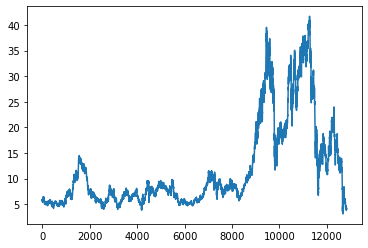

In [57]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [58]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [59]:
df1

0        5.757882
1        5.799305
2        5.695746
3        5.757882
4        5.965000
           ...   
12824    4.150000
12825    4.140000
12826    4.270000
12827    4.290000
12828    4.130000
Name: Close, Length: 12829, dtype: float64

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [61]:
print(df1)


[[0.06839207]
 [0.06946604]
 [0.06678108]
 ...
 [0.02981592]
 [0.03033446]
 [0.02618616]]


In [62]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [63]:
training_size,test_size

(8338, 4491)

In [64]:
train_data

array([[0.06839207],
       [0.06946604],
       [0.06678108],
       ...,
       [0.08551569],
       [0.09177918],
       [0.08451045]])

In [65]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [66]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [67]:
print(X_train.shape), print(y_train.shape)

(8237, 100)
(8237,)


(None, None)

In [68]:
print(X_test.shape), print(y_test.shape)

(4390, 100)
(4390,)


(None, None)

In [69]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [70]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [71]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [72]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
129/129 [==============================] - 27s 206ms/step - loss: 6.6603e-04 - val_loss: 0.0025
Epoch 2/100
129/129 [==============================] - 25s 194ms/step - loss: 8.7765e-05 - val_loss: 0.0016
Epoch 3/100
129/129 [==============================] - 25s 195ms/step - loss: 7.4455e-05 - val_loss: 0.0010
Epoch 4/100
129/129 [==============================] - 25s 195ms/step - loss: 6.9138e-05 - val_loss: 8.0411e-04
Epoch 5/100
129/129 [==============================] - 25s 197ms/step - loss: 6.3559e-05 - val_loss: 8.1445e-04
Epoch 6/100
129/129 [==============================] - 25s 196ms/step - loss: 5.6625e-05 - val_loss: 0.0012
Epoch 7/100
129/129 [==============================] - 25s 194ms/step - loss: 5.4264e-05 - val_loss: 7.4295e-04
Epoch 8/100
129/129 [==============================] - 25s 196ms/step - loss: 4.8620e-05 - val_loss: 5.8415e-04
Epoch 9/100
129/129 [==============================] - 25s 193ms/step - loss: 4.4315e-05 - val_loss: 6.1729e-04
Epoch 10

In [77]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [78]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [79]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

7.252106224383565

In [80]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

21.947937712338334

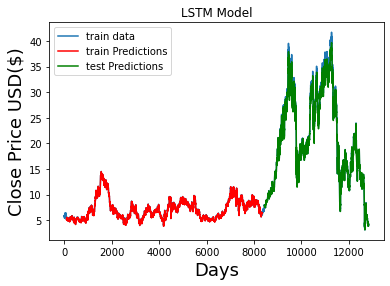

In [81]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot, color= 'r')
plt.plot(testPredictPlot, color = 'g')
plt.xlabel('Days', fontsize =18)
plt.ylabel('Close Price USD($)', fontsize = 18)
plt.legend(['train data','train Predictions','test Predictions'], loc='upper left')
plt.title('LSTM Model')
plt.show()

In [82]:
len(test_data)

4491

In [87]:
x_input=test_data[4391:].reshape(1,-1)
x_input.shape

(1, 100)

In [88]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [89]:
temp_input

[0.08737360869519338,
 0.08400311340428089,
 0.08166969358749528,
 0.08322530679868569,
 0.06922478789797219,
 0.07415089640007509,
 0.06792844355531354,
 0.07363235866301161,
 0.07778066055951934,
 0.07337308979447989,
 0.07778066055951934,
 0.07103966997769433,
 0.06352087279027412,
 0.06611356147559143,
 0.05574280673432218,
 0.05781695768257601,
 0.052113042574877935,
 0.05833549541963949,
 0.06663209921265491,
 0.06740990581825008,
 0.061965259579083734,
 0.06144672184202028,
 0.07103966997769433,
 0.06922478789797219,
 0.06844698129237699,
 0.06740990581825008,
 0.0650764860014645,
 0.062483797316147185,
 0.06792844355531354,
 0.061965259579083734,
 0.06144672184202028,
 0.06222452844761546,
 0.06896551902944047,
 0.07415089640007509,
 0.06637283034412315,
 0.06792844355531354,
 0.07570650961126547,
 0.07311382092594816,
 0.07415089640007509,
 0.0718174765832895,
 0.0759657784797972,
 0.07259528318888471,
 0.07337308979447989,
 0.06766917468678181,
 0.061965259579083734,
 0.05574

In [90]:
# demonstrate prediction for next 60 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.02535255]
101
1 day input [0.08400311 0.08166969 0.08322531 0.06922479 0.0741509  0.06792844
 0.07363236 0.07778066 0.07337309 0.07778066 0.07103967 0.06352087
 0.06611356 0.05574281 0.05781696 0.05211304 0.0583355  0.0666321
 0.06740991 0.06196526 0.06144672 0.07103967 0.06922479 0.06844698
 0.06740991 0.06507649 0.0624838  0.06792844 0.06196526 0.06144672
 0.06222453 0.06896552 0.0741509  0.06637283 0.06792844 0.07570651
 0.07311382 0.0741509  0.07181748 0.07596578 0.07259528 0.07337309
 0.06766917 0.06196526 0.05574281 0.06040965 0.06144672 0.05652061
 0.05807623 0.05885403 0.05600208 0.05703915 0.05185377 0.04848328
 0.04692767 0.0357791  0.03681618 0.03214934 0.0350013  0.03318642
 0.0316308  0.03733472 0.04044594 0.04407571 0.03733472 0.0350013
 0.02826031 0.030853   0.02644542 0.03033446 0.02696396 0.02514908
 0.02151932 0.02592689 0.02877884 0.02385274 0.02618616 0.03266788
 0.02955665 0.03033446 0.02877884 0.02800104 0.02981592 0.02463054
 0.02229712 0.02670469 0.02540835 0

In [91]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [92]:
import matplotlib.pyplot as plt

In [93]:
len(df1)

12829

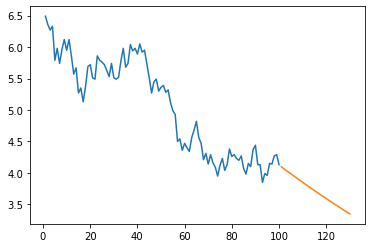

In [94]:
plt.plot(day_new,scaler.inverse_transform(df1[12729:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

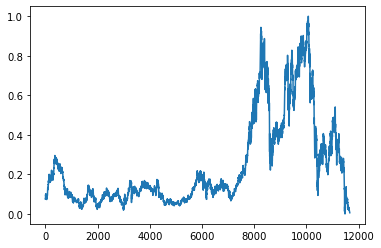

In [95]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [96]:
df3=scaler.inverse_transform(df3).tolist()

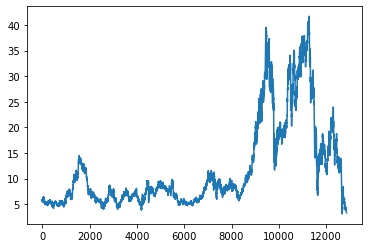

In [97]:
plt.plot(df3)